In [1]:
# this code is pretty much completely copied from "tests/2023-07-04 monte carlo tc categories.ipynb"

In [6]:
# both functions have been simplified and saved under "scripts-winter2023/compile_statistics.py"
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/Users/etmu9498/research/code/scripts-winter2023/cloud-top-height-stats")
import distributions_general
import distributions_general_flight_legs as xypaths
os.chdir( "/Users/etmu9498/research/code/scripts-winter2023")
import compile_statistics

# reload all the metadata and heights for this case
# passes = compile_statistics.find_dists(save=True)

# or, to save some time, load the locally saved file here!
passes = pd.read_pickle("/Users/etmu9498/research/data/aa_paper_1_data/flight_heights_metadata.pkl")

Number of data points in original dist: 3115
Number of Monte Carlo Tests: 12
td distribution created


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of data points in original dist: 5044
Number of Monte Carlo Tests: 39


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ts distribution created
Number of data points in original dist: 2621
Number of Monte Carlo Tests: 21


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


wh distribution created
Number of data points in original dist: 1644
Number of Monte Carlo Tests: 19
sh distribution created


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


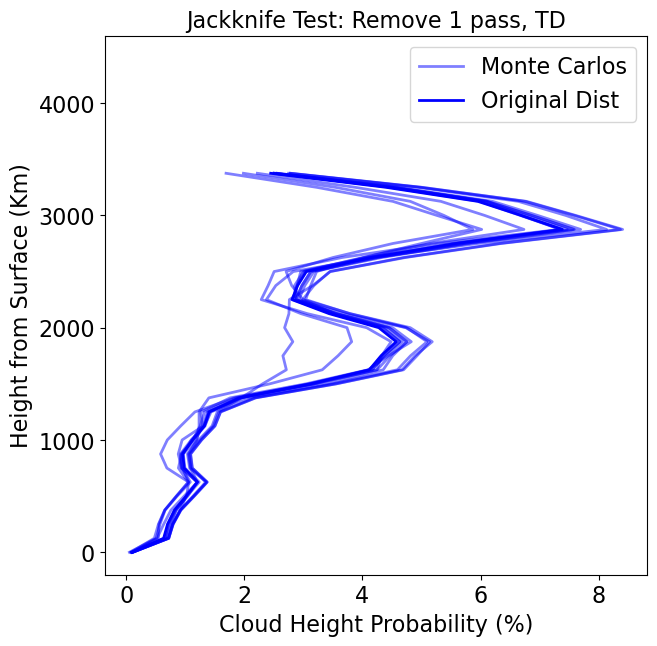

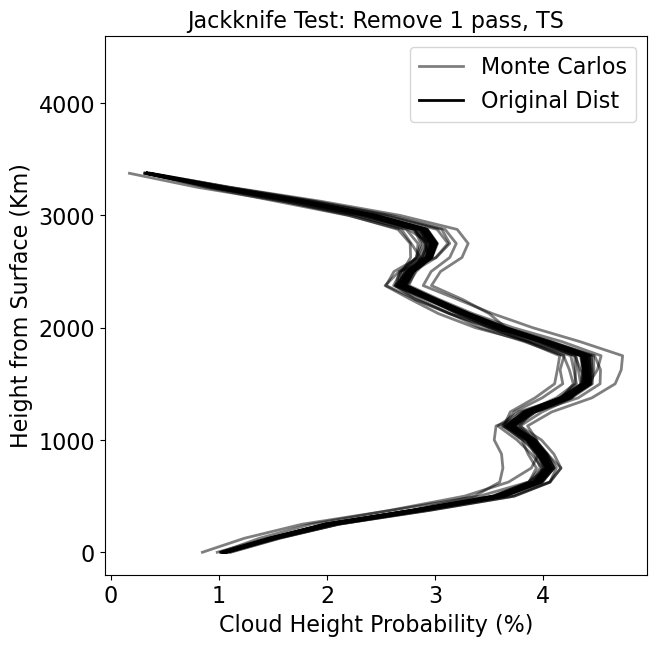

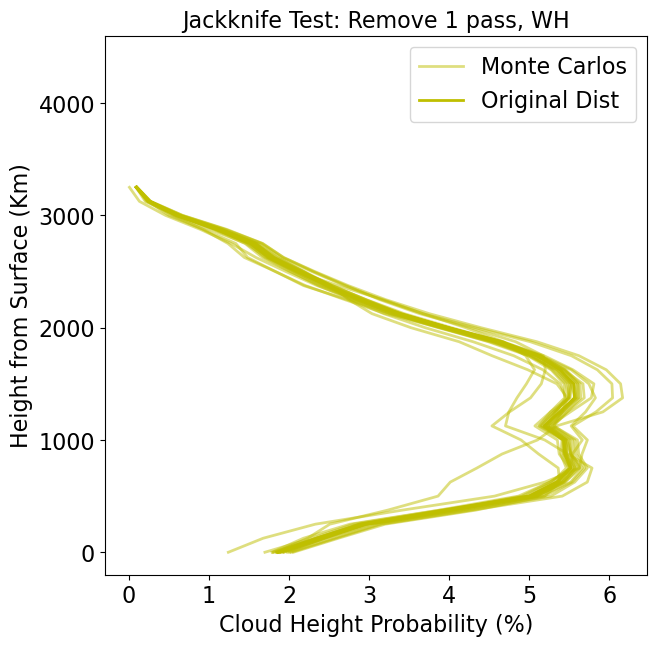

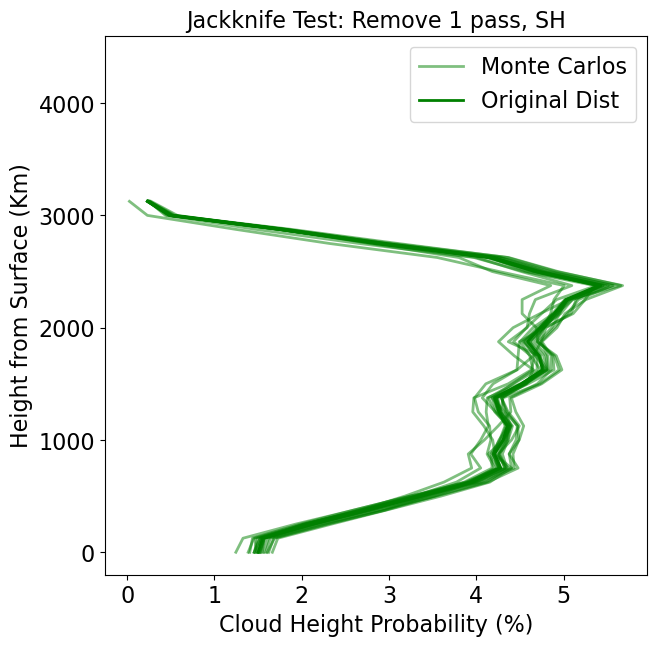

In [8]:
# jackknife test

cats = ['td', 'ts', 'wh', 'sh']
colors = ['b', 'k', 'y', 'g']
savenames = ['jackknife-smooth-td.png', 'jackknife-smooth-ts.png', 'jackknife-smooth-wh.png', 'jackknife-smooth-sh.png']
titlecase = ['TD', 'TS', 'WH', 'SH']
for cati, cat in enumerate(cats):
    # passes to remove from analysis
    tc = np.where( ~ ( passes['category'] == cat))[0].tolist()    
    keepinds = np.where( ( passes['category'] == cat))[0].tolist()
    
    # jackknife test v1: remove individual eye passes
    title = ': Remove 1 pass, ' + titlecase[cati]
    distributions_general.plot_monte_carlo( keepinds=keepinds, removeinds=tc, df_passes=passes, binwidth=125, smoothwidth=5, color=colors[cati], title=title)

    os.chdir('/Users/etmu9498/research-private/eye-cloud-paper/')
    plt.savefig(savenames[cati], bbox_inches='tight')    
    print( cat + " distribution created")

All eye passes loaded.
Number of data points in original dist: 3115
Number of Monte Carlo Tests: 100


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


td distribution created
All eye passes loaded.
Number of data points in original dist: 5044
Number of Monte Carlo Tests: 100


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ts distribution created
All eye passes loaded.
Number of data points in original dist: 2621
Number of Monte Carlo Tests: 100


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


wh distribution created
All eye passes loaded.
Number of data points in original dist: 1644
Number of Monte Carlo Tests: 100


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


sh distribution created


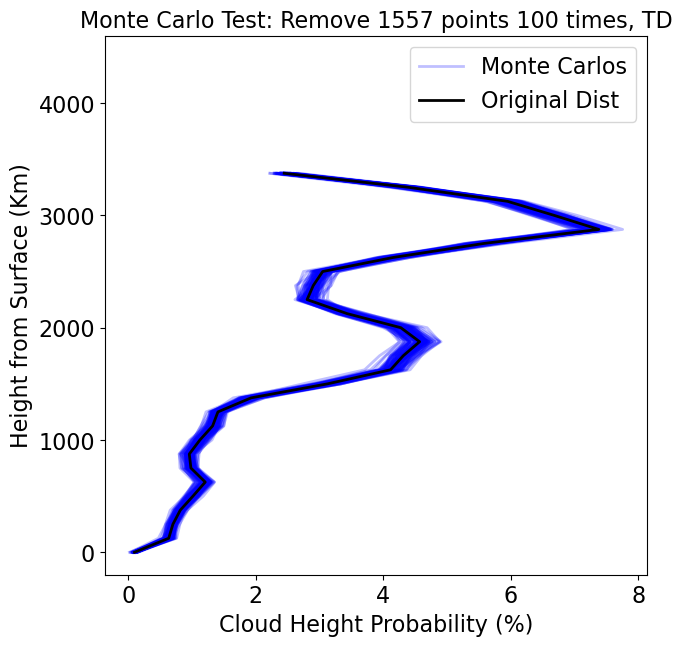

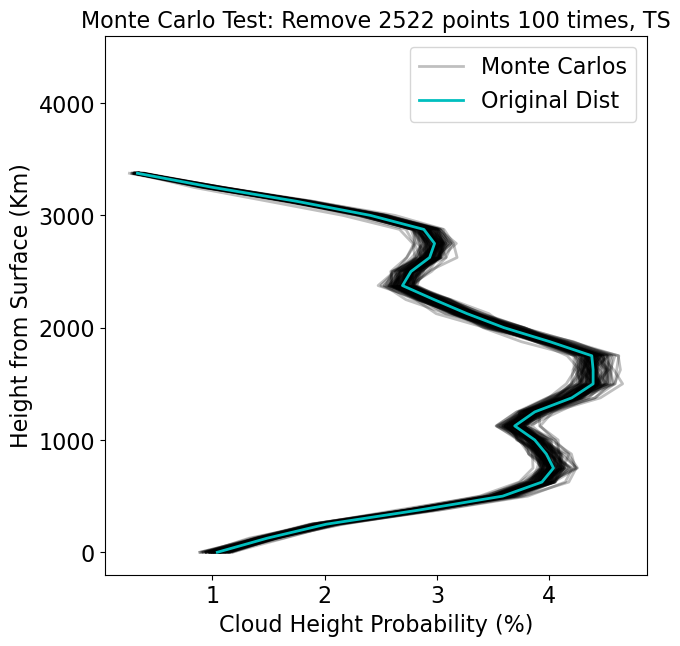

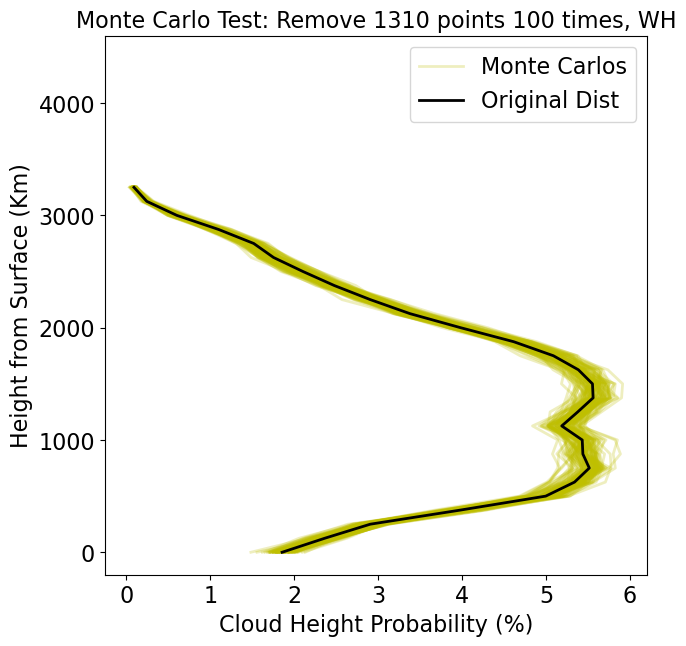

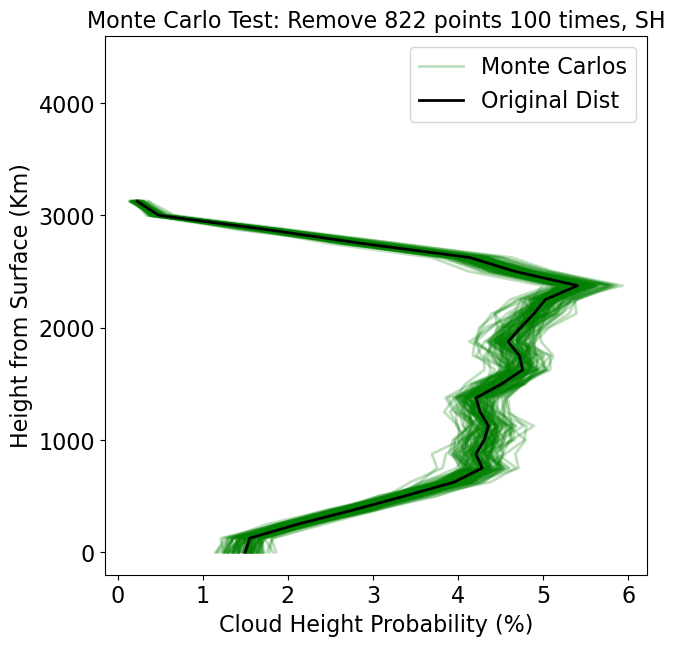

In [10]:
# monte carlo test

cats = ['td', 'ts', 'wh', 'sh']
colors = ['b', 'k', 'y', 'g']
savenames = ['monte-smooth-td.png', 'monte-smooth-ts.png', 'monte-smooth-wh.png', 'monte-smooth-sh.png']

# titles = [': Remove 1 Pass, TD', ': Remove 1 Pass, TS', ': Remove 1 Pass, WH', ': Remove 1 Pass, SH']
titlecase = ['TD', 'TS', 'WH', 'SH']
totalpts = [3115, 5044, 2621, 1644]
for cati, cat in enumerate(cats):
    # passes to remove from analysis
    tc = np.where( ~ ( passes['category'] == cat))[0].tolist()    
    keepinds = np.where( ( passes['category'] == cat))[0].tolist()
    
    # monte carlo test v2: remove a set number of data points
    n = 100
    title = ': Remove ' + str( int(totalpts[cati] / 2)) + ' points ' + str( n) + ' times, ' + titlecase[cati]
    distributions_general.plot_monte_carlo_random_remove( removecount= int(totalpts[cati] / 2), ntests=n, removeinds=tc, df_passes=passes, binwidth=125, smoothwidth=5, color=colors[cati], title=title)

    os.chdir('/Users/etmu9498/research-private/eye-cloud-paper/')
    plt.savefig(savenames[cati], bbox_inches='tight')
    
    print( cat + " distribution created")